###Imports

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, accuracy_score, roc_auc_score, plot_confusion_matrix, plot_roc_curve
from sklearn.model_selection import GridSearchCV

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sys import getsizeof
import pandas as pd
import time
import warnings
from sklearn.exceptions import ConvergenceWarning
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import KFold
import itertools

## Load dataset

In [ ]:
trainingset = np.loadtxt('/content/drive/MyDrive/My data files/dl midterm/training.csv', delimiter=',')
testingset = np.loadtxt('/content/drive/MyDrive/My data files/dl midterm/test.csv', delimiter=',')

## Split data

In [ ]:
n_inputs = 2304 # images are 48 x 48
n_classes = 7 # 7 classes - as defined below
img_dim = 48 # each input image dimension, width and height are both 48

x_training = trainingset[:, 0:n_inputs] # Extract the first 2304 elements - the image
y_training = trainingset[:, n_inputs:n_inputs + n_classes] # Extract the last 7 elements - a one hot category encoding

x_testing = testingset[:, 0:n_inputs] # Extract the first 2304 elements - the image
y_testing = testingset[:, n_inputs:n_inputs + n_classes] # Extract the last 7 elements - a one hot category encoding

x_training = x_training.reshape(x_training.shape[0], 48, 48) # Make samples image shaped
x_testing = x_testing.reshape(x_testing.shape[0], 48, 48) # Make samples image shaped

In [ ]:
x_training.shape

(28709, 48, 48)

In [ ]:
def get_emotion(whichemotion):
    if whichemotion.shape[0] == 1:
        indx = whichemotion[0]
    else:
        indx = np.argmax(whichemotion)
    if indx == 0:
        return 'angry'
    elif indx == 1:
        return 'disgust'
    elif indx == 2:
        return 'fear'
    elif indx == 3:
        return 'happy'
    elif indx == 4:
        return 'sad'
    elif indx == 5:
        return 'surprise'
    elif indx == 6:
        return 'neutral'

(28709, 48, 48)
(28709, 7)
(3589, 48, 48)
(3589, 7)


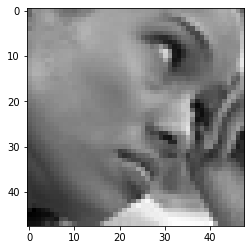

facial emotion: angry


In [ ]:
print(x_training.shape)
print(y_training.shape)

print(x_testing.shape)
print(y_testing.shape)

sampleindex = np.random.randint(0,1000)
sample = x_training[sampleindex, :]
sample = sample.reshape(48, 48)

plt.imshow(sample, cmap='gray')
plt.show()
print('facial emotion: %s' % get_emotion(y_training[sampleindex, :]))

# Part I : Happy or Sad

## For this part you will consider a binary classification problem - categorizing faces as happy or sad

### Saving the data sample containing only happy or sad faces. 

Saving them in happy_sad_x and happy_sad_y variables

In [ ]:
x_data = np.concatenate([x_training, x_testing])
y_data = np.concatenate([y_training, y_testing])

new_x = []
new_y = []
    
for i in range (0, len(y_data)):
    if (get_emotion(y_data[i, :]) == 'happy' or get_emotion(y_data[i, :]) == 'sad'):
        new_x.append(x_data[i, :])
        new_y.append(y_data[i, :])
    else:
        pass
   
# sample containing only happy or sad faces
happy_sad_x = np.array(new_x)
happy_sad_y = np.array(new_y)

In [ ]:
happy_sad_x.shape # Data with only happy and sad samples

(13593, 48, 48)

In [ ]:
x_data.shape # Data with all emotions

(32298, 48, 48)

[4 Marks] b. Apply PCA and LDA to represent the faces, display a sample of a few faces for each case. You may consider using one or both of these in the steps that follow if they are of any value (this is for you to decide).

## ***Principal Component Analysis (P.C.A)***

We use PCA to reduce the dimensionality if dataset. In this case we compress our image data.

We have fit PCA twice for comparision, by changing the components parameters (2304 and 256)

### In the following cells we can observe that PCA was able to achieve 95% variance using only 256 components as opposed to 2304 components

In [ ]:
nsamples, nx, ny = happy_sad_x.shape
happy_sad_dataset = happy_sad_x.reshape((nsamples,nx*ny))

nsamples, nx, ny = x_data.shape
x_data = x_data.reshape((nsamples,nx*ny))

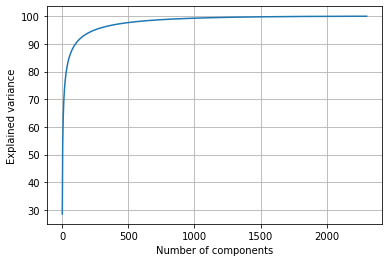

In [ ]:
# Applying PCA while retaining 2304 components
from sklearn.decomposition import PCA

pca_2304 = PCA(n_components=2304)
pca_2304.fit(happy_sad_dataset)

plt.grid()
plt.plot(np.cumsum(pca_2304.explained_variance_ratio_ * 100))
plt.xlabel('Number of components')
plt.ylabel('Explained variance')
plt.savefig('Scree plot.png')

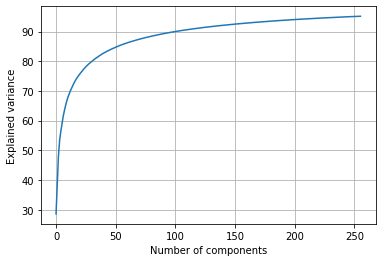

In [ ]:
# Reducing the components to 256, which gives a good balance of information and efficiency
pca = PCA(256)
pca.fit(happy_sad_dataset)
plt.grid()
plt.plot(np.cumsum(pca.explained_variance_ratio_ * 100))
plt.xlabel('Number of components')
plt.ylabel('Explained variance')
plt.savefig('Scree plot.png')

In [ ]:
# Applying PCA on happpy_sad dataset
happy_sad_components1 = pca_2304.transform(happy_sad_dataset)
happy_sad_components2 = pca.transform(happy_sad_dataset)

In [ ]:
happy_sad_components1.shape

(13593, 2304)

In [ ]:
happy_sad_components2.shape

(13593, 256)

In [ ]:
print(getsizeof(happy_sad_components1))
print(getsizeof(happy_sad_components2))

250546296
27838584


# Samples of a face without PCA, with PCA retaining 2304 components, and with 256 components after PCA

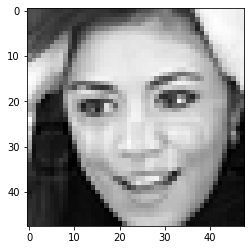

actual image



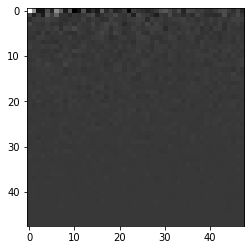

PCA with 2304 components



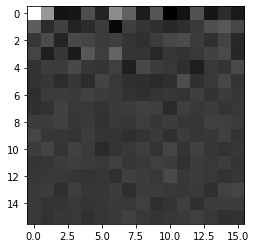

PCA with 256 components



In [ ]:
sampleindex = 39
sample = happy_sad_components2[sampleindex, :]
sample = sample.reshape(16, 16)

sample2 = happy_sad_components1[sampleindex, :]
sample2 = sample2.reshape(48, 48)

sample3 = x_training[sampleindex, :]
sample3 = sample3.reshape(48, 48)

plt.imshow(sample3, cmap='gray')
plt.show()
print('actual image\n')

plt.imshow(sample2, cmap='gray')
plt.show()
print('PCA with 2304 components\n')

plt.imshow(sample, cmap='gray')
plt.show()
print('PCA with 256 components\n')

## ***linear discriminant analysis (L.D.A)***

In [ ]:
# Getting target variable for happy sad dataset
h_s_df = pd.DataFrame(happy_sad_y, columns=['0','1','2','3','4','5','6'])
hs_target = h_s_df['4'].tolist()

X_train4, X_test4, y_train4, y_test4 = train_test_split(happy_sad_dataset, hs_target, test_size = 0.2, random_state = 42)

In [ ]:
lda = LinearDiscriminantAnalysis()
def get_results_lda_happy_sad(model):
  accuracy = cross_val_score(model, X_train4, y_train4, scoring='accuracy').mean()
  f1 = cross_val_score(model, X_train4, y_train4, scoring='f1').mean()
  ROC_AUC = cross_val_score(model, X_train4, y_train4, scoring='roc_auc').mean()
  return str([accuracy*100, f1*100, ROC_AUC*100])

start = time.time()
print('\n LDA Performance on happy_sad_dataset:')
print('accuracy, f1, ROC_AUC: '+str(get_results_lda_happy_sad(lda)))
end = time.time()
print(str(end-start)+' seconds')


 LDA Performance on happy_sad_dataset:
accuracy, f1, ROC_AUC: [64.84280472459263, 55.35872644918525, 67.91730539794762]
110.95700073242188 seconds


# ***Modeling with Naive Bayes, Logistic Regression, SVM***

In [ ]:
# Split into 80% training and 20% testing set
X_train, X_test, y_train, y_test = train_test_split(happy_sad_components2, hs_target, test_size = 0.2, random_state = 42)

X_train2, X_test2, y_train2, y_test2 = train_test_split(happy_sad_components1, hs_target, test_size = 0.2, random_state = 42)

In [ ]:
# Function for calculating accuracy, f1, roc_auc scores

# Function for getting modeling results of happy_sad_dataset after applying PCA 256
def get_results(model):
  accuracy = cross_val_score(model, X_train, y_train, scoring='accuracy').mean()
  f1 = cross_val_score(model, X_train, y_train, scoring='f1').mean()
  ROC_AUC = cross_val_score(model, X_train, y_train, scoring='roc_auc').mean()
  return [accuracy*100, f1*100, ROC_AUC*100]

# Function for getting modeling results of happy_sad_dataset after before PCA 2304
def get_results2(model):
  accuracy = cross_val_score(model, X_train2, y_train2, scoring='accuracy').mean()
  f1 = cross_val_score(model, X_train2, y_train2, scoring='f1').mean()
  ROC_AUC = cross_val_score(model, X_train2, y_train2, scoring='roc_auc').mean()
  return [accuracy*100, f1*100, ROC_AUC*100]

# Function for getting modeling results of whole dataset after applying PCA.
def get_results3(model):
  accuracy = cross_val_score(model, X_train3, y_train3, scoring='accuracy').mean()
  f1 = cross_val_score(model, X_train3, y_train3, scoring='f1').mean()
  ROC_AUC = cross_val_score(model, X_train3, y_train3, scoring='roc_auc').mean()
  return [accuracy*100, f1*100, ROC_AUC*100]

In [ ]:
# Models
nb = GaussianNB()
lg = LogisticRegression()
svm = SVC()

In [ ]:
print('Naive Bayes model performance with only 256 components:')
start = time.time()
print('accuracy, f1, ROC_AUC: '+str(get_results(nb)))
end = time.time()
print(str(end-start)+' seconds')

start = time.time()
print('\nNaive Bayesmodel performance with 2304 components:')
warnings.simplefilter("ignore", category=ConvergenceWarning)
print('accuracy, f1, ROC_AUC: '+str(get_results2(nb)))
end = time.time()
print(str(end-start)+' seconds')

print('\nLogistic Regression model performance with 256 components:')
start = time.time()
print('accuracy, f1, ROC_AUC: '+str(get_results(lg)))
end = time.time()
print(str(end-start)+' seconds')

start = time.time()
print('\nLogistic Regression performance with 2304:')
print('accuracy, f1, ROC_AUC: '+str(get_results2(lg)))
end = time.time()
print(str(end-start)+' seconds')

Naive Bayes model performance with only 256 components:
accuracy, f1, ROC_AUC: [59.72970846683373, 47.474381789551394, 61.46587652796439]
0.7091066837310791 seconds

Naive Bayesmodel performance with 2304 components:
accuracy, f1, ROC_AUC: [55.04882149541604, 43.998730508256386, 54.38279241216056]
4.829497337341309 seconds

Logistic Regression model performance with 256 components:
accuracy, f1, ROC_AUC: [68.44763506011485, 65.03194770412134, 75.39148815812314]
3.5499722957611084 seconds

Logistic Regression performance with 2304:
accuracy, f1, ROC_AUC: [64.66804978375578, 61.29583183337104, 70.47389141504497]
14.947932481765747 seconds


Tried to change the parameters like 'C' value, gamma, and kernel, but we found no improvement, so we're proceeding default parameters

In [ ]:
svm = SVC()
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)
print(f"The model is {accuracy_score(y_pred,y_test)*100}% accurate")

The model is 74.2184626700993% accurate


As a standalone model LDA did a decent job of 64.84% accuracy, but overall PCA achieved better results when combined with Logistic Regression and SVM models with an accuracy over 68% and 74% respectively.

Training time with PCA was significantly reduced because of the lesser number of components in the images.

So we decided to go with PCA for rest of the job.

# Part II : Multi-class

### Plotting the variance curve for all_emotions_componets dataset, and happy_sad_dataset.

As we can see in the following figure, Both the curves are pretty much overlapping.

In [ ]:
pca2 = PCA(256)

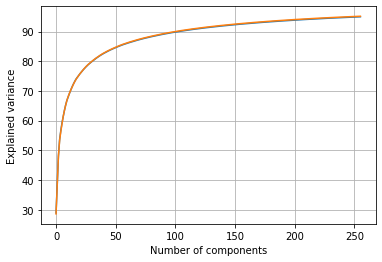

In [ ]:
# Applying PCA on the whole dataset
pca.fit(x_data)
all_emotions_components = pca.transform(x_data)

pca2.fit(happy_sad_dataset)
plt.grid()
plt.plot(np.cumsum(pca.explained_variance_ratio_ * 100))
plt.plot(np.cumsum(pca2.explained_variance_ratio_ * 100))
plt.xlabel('Number of components')
plt.ylabel('Explained variance')
plt.savefig('Scree plot.png')

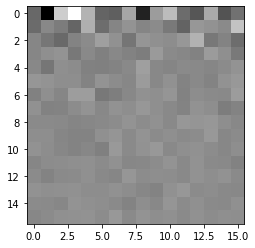

PCA with 256 components



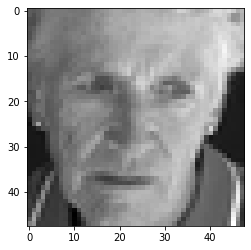

Original Image



In [ ]:
# Images samples from all_emotions dataset, with and without PCA
sampleindex = 50
sample = all_emotions_components[sampleindex, :]
sample = sample.reshape(16, 16)

sample2 = x_data[sampleindex, :]
sample2 = sample2.reshape(48, 48)


plt.imshow(sample, cmap='gray')
plt.show()
print('PCA with 256 components\n')

plt.imshow(sample2, cmap='gray')
plt.show()
print('Original Image\n')

## LDA on all emotions

In [ ]:
# function for reverse one-hot from a df
def reverse_onehot(row):
  for c in full_df.columns:
    if row[c]==1:
      return c


# Getting target variable for all emotions dataset
full_df = pd.DataFrame(y_data, columns=['0','1','2','3','4','5','6'])
full_df = full_df.apply(reverse_onehot, axis=1)
l = full_df.tolist()
multi_class_targets = [] 
for i in range (0, len(l)):
  val = int(l[i])
  multi_class_targets.append(val)

X_train3, X_test3, y_train3, y_test3 = train_test_split(all_emotions_components, multi_class_targets, test_size = 0.2, random_state = 42)

In [ ]:
lda = LinearDiscriminantAnalysis()
def get_results_lda(model):
  accuracy = cross_val_score(model, X_train3, y_train3, scoring='accuracy').mean()
  return accuracy

start = time.time()
print('\n LDA Performance on happy_sad_dataset:')
warnings.simplefilter("ignore", category=ConvergenceWarning)
accuracy = get_results_lda(lda);
end = time.time()
print(str(end-start)+' seconds')
print('Accuracy of LDA on multiclass dataset is: ', accuracy*100)


 LDA Performance on happy_sad_dataset:
4.262787580490112 seconds
Accuracy of LDA on multiclass dataset is:  36.70562425514143


In [ ]:
# Naive Bayes
def get_result(model):
  accuracy = cross_val_score(model, X_train3, y_train3, scoring='accuracy').mean()
  return accuracy
acc = get_result(nb)*100

print('Accuracy is: ', acc)

Accuracy is:  24.84708267098717


#Visualize the results of your classifier on the test set using a confusion matrix. Describe briefly how the multi-class nature of the problem is treated by the classifier.

###From the figure below, we can see that Naive Bayes has the least accuracy of 24%, and most of the accuracy is coming from 3 classes 1, 2, and 3, which are disgust, fear, and happy. 

###Naive Bayes also got the least accuracy with binary classification but atleast it gave acceptable performance compared to multi-class classification.

Normalized confusion matrix


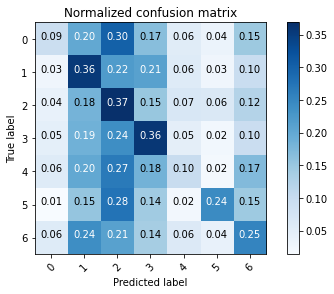

In [ ]:
def evaluate_model(data_x, data_y, model):
  k_fold = KFold(10, shuffle=True, random_state=1)

  predicted_targets = np.array([])
  actual_targets = np.array([])

  train_x, train_y, test_x, test_y = X_train3,  y_train3, X_test3, y_test3

  
        
    # Fit the classifier
  classifier = model.fit(train_x, train_y)

    # Predict the labels of the test set samples
  predicted_labels = classifier.predict(test_x)

  predicted_targets = np.append(predicted_targets, predicted_labels)
  actual_targets = np.append(actual_targets, test_y)

  return predicted_targets, actual_targets 

def generate_confusion_matrix(cnf_matrix, classes, normalize=False, title='Confusion matrix'):
    if normalize:
        cnf_matrix = cnf_matrix.astype('float') / cnf_matrix.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.imshow(cnf_matrix, interpolation='nearest', cmap=plt.get_cmap('Blues'))
    plt.title(title)
    plt.colorbar()

    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cnf_matrix.max() / 2.

    for i, j in itertools.product(range(cnf_matrix.shape[0]), range(cnf_matrix.shape[1])):
        plt.text(j, i, format(cnf_matrix[i, j], fmt), horizontalalignment="center",
                 color="white" if cnf_matrix[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

    return cnf_matrix

def plot_confusion_matrix(predicted_labels_list, y_test_list):
    cnf_matrix = confusion_matrix(y_test_list, predicted_labels_list)
    np.set_printoptions(precision=2)

    # Plot normalized confusion matrix
    plt.figure()
    generate_confusion_matrix(cnf_matrix, classes=['0','1','2','3','4','5','6'], normalize=True, title='Normalized confusion matrix')
    plt.show()

pred_targets, actu_targets = evaluate_model(all_emotions_components, multi_class_targets, nb)
plot_confusion_matrix(pred_targets, actu_targets)

In [ ]:
acc = get_result(lg)*100

print('Accuracy for logitsttic regression on multiclass dataset is: ', acc)

Accuracy for logitsttic regression on multiclass dataset is:  35.467151774688254




##Accuracy for logistic regression on multi-class is 35% which is better than Naive Bayes, but still not acceptable.

##From the figure below we can see that the model's highest performance comes from class 3, and 5, which are happy and surprise. The performance is not bad with over 50% but overall when we consider all the classes, the model performed poorly.

Normalized confusion matrix


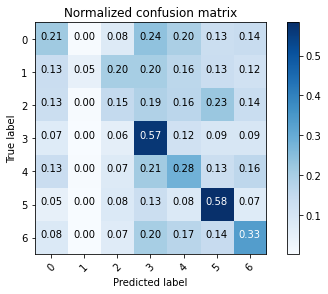

In [ ]:
# Confusion matrix for logistic regression
pred_targets, actu_targets = evaluate_model(all_emotions_components, multi_class_targets, lg)
plot_confusion_matrix(pred_targets, actu_targets)

In [ ]:
acc = get_result(svm)*100
print('Accuracy for SVM on multiclass dataset is: ', acc)

Accuracy for SVM on multiclass dataset is:  42.86321086245709


Normalized confusion matrix


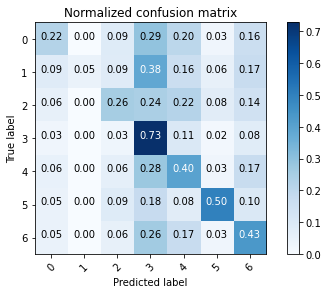

In [ ]:
pred_targets, actu_targets = evaluate_model(all_emotions_components, multi_class_targets, svm)
plot_confusion_matrix(pred_targets, actu_targets)


out of all the models svm has the highest accuracy of 42%, but only one class has good performance which is 3 (happy). 4, 5, and 6 classes were a bit more consistent compared to the previous models, but 0, 1, and 2 did poorly.


**LEAST SIMILAR:**
- For SVM and Logistic regression the (1) disgust faces were the least similar to other classes.
- But for naive bayes (5) surprise is the least similar to all classes.


**HIGHLY SIMILAR:**
- For SVM and Logistic regression the (3) happy faces were the most similar faces to other classes.
- But for naive bayes (2) fear was most similar to other classes.

